# Problema de Negócio
Construção de modelo ML capaz de prever se um paciente vai ou não desenvolver uma doeça hepática, com base em diversas caracteristicas do paciente

# Aprendizado Supervisionado - Classificação 

In [4]:
# Para salvamento em disco após o treinamento
import joblib
import pickle

# Padrão
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scickit Learn
from sklearn.model_selection import train_test_split #Dividir dados em treino e teste
from sklearn.model_selection import GridSearchCV # Otimização de Hiper parametros
from sklearn.model_selection import cross_val_score # Avaliação cruzada
from sklearn.model_selection import RandomizedSearchCV # Outra técnica de otimizar hiper
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.ensemble import RandomForestClassifier # Algorítmo de classificação do Random Forest - método ensemble
from sklearn.neighbors import KNeighborsClassifier # Outro classificador
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score # Principal métrica para seleção do modelo

# Carregando Conjunto de Dados

In [7]:
dados = pd.read_csv('dados/dataset.csv'); dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [43]:
nums = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target']

In [14]:
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.8,1
248,40,Male,0.7,0.1,202,37,29,5.0,2.6,1.0,1
356,33,Male,0.7,0.2,256,21,30,8.5,3.9,0.8,1
81,29,Male,1.0,0.3,75,25,26,5.1,2.9,1.3,1
92,60,Male,8.6,4.0,298,412,850,7.4,3.0,0.6,1
333,36,Female,0.7,0.2,152,21,25,5.9,3.1,1.1,2
458,26,Male,6.8,3.2,140,37,19,3.6,0.9,0.3,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.8,2
121,32,Male,22.7,10.2,290,322,113,6.6,2.8,0.7,1
150,56,Male,1.1,0.5,180,30,42,6.9,3.8,1.2,2


In [10]:
dados.shape

(583, 11)

# EDA

In [12]:
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [18]:
# Filtra o DF por tipo de dado
dados.dtypes[dados.dtypes== 'object']

Gender    object
dtype: object

In [34]:
dados.dtypes[dados.dtypes!= 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object

In [16]:
dados.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Variáveis Numéricas

In [21]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


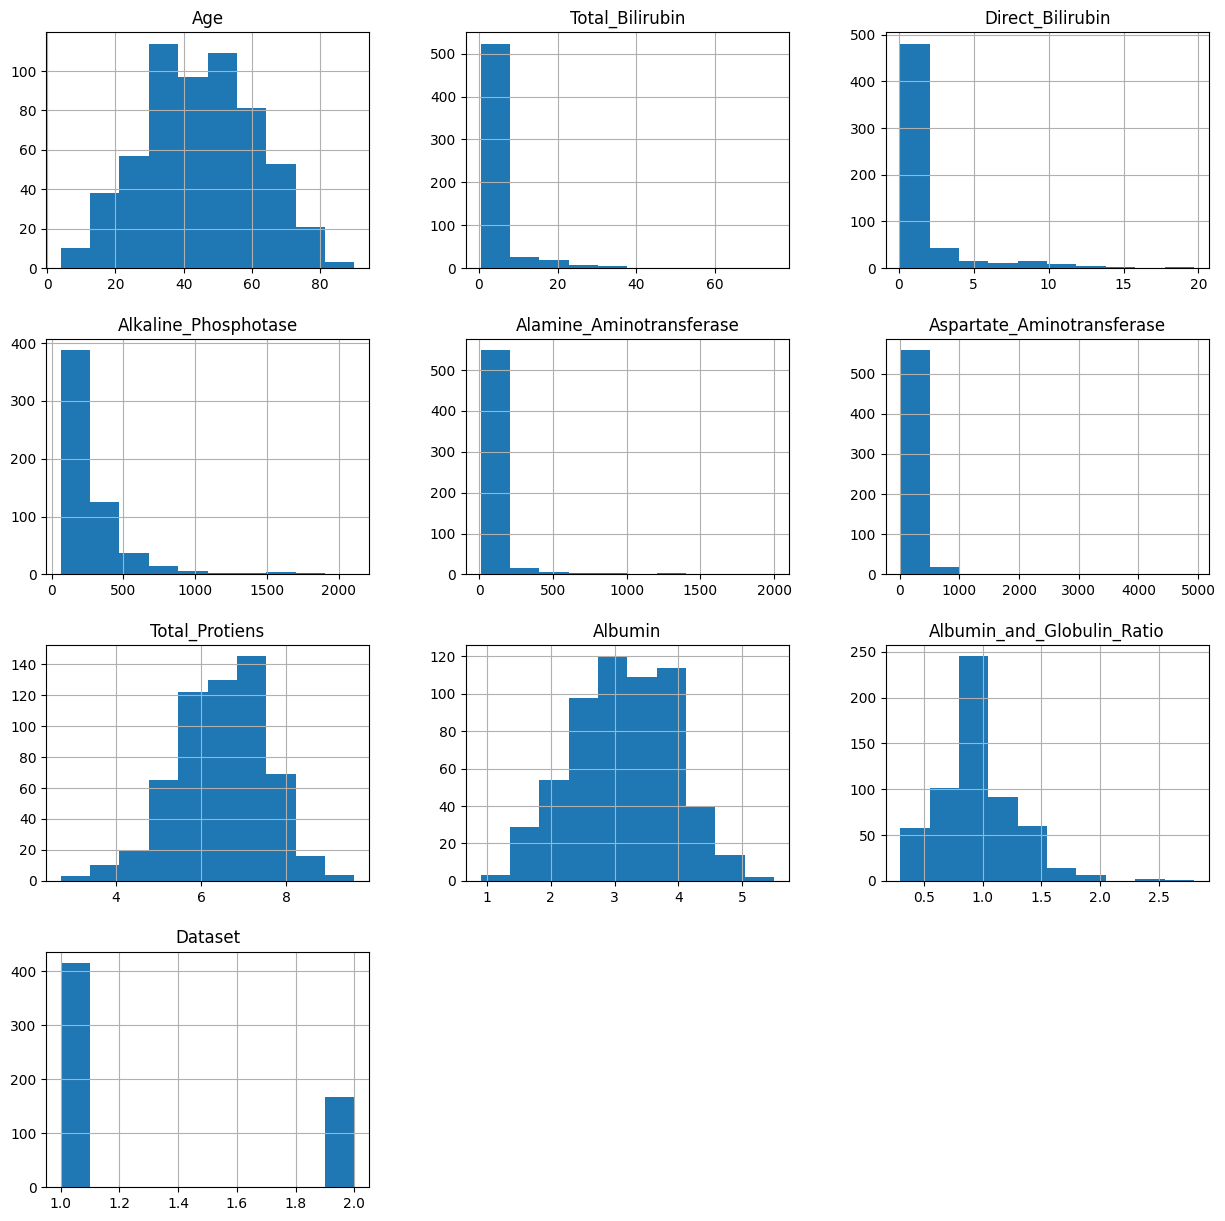

In [22]:
# Plotagem de histograma
dados.hist(figsize = (15,15), bins = 10)
plt.show()

###### As variáveis 'Alamine_Aminotransferase' e 'Aspartate_Aminotransferase' mostram outliers


###### A varíavel alvo tem valores 1 e 2 (negativo / falso)

In [23]:
# Função para ajustar a vaiavel target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [24]:
# Aplicando a função na variavel
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [25]:
# Ajustar nome da variável alvo
dados.rename({'Dataset': 'Target'}, axis='columns', inplace = True)

In [45]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
542,62,Male,0.7,0.2,173,46,47,7.3,4.1,1.2,0
57,48,Female,0.9,0.2,175,24,54,5.5,2.7,0.9,0
280,58,Male,0.8,0.2,123,56,48,6.0,3.0,1.0,1
356,33,Male,0.7,0.2,256,21,30,8.5,3.9,0.8,1
311,54,Female,23.2,12.6,574,43,47,7.2,3.5,0.9,1


In [47]:
dados[nums].corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


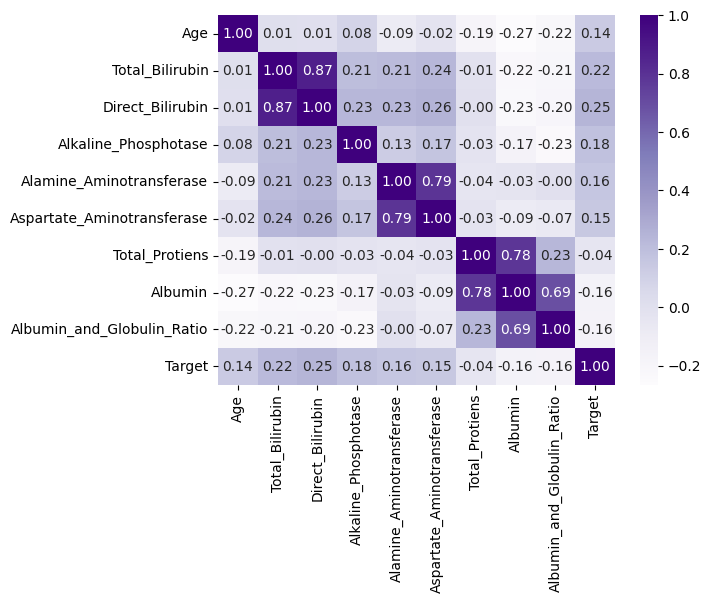

In [49]:
sns.heatmap(dados[nums].corr(), cmap = 'Purples', annot = True, fmt = '.2f');

# Variáveis Categóricas

In [50]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Numéro de pacientes do sexo masculino: 441
Numéro de pacientes do sexo feminino: 142


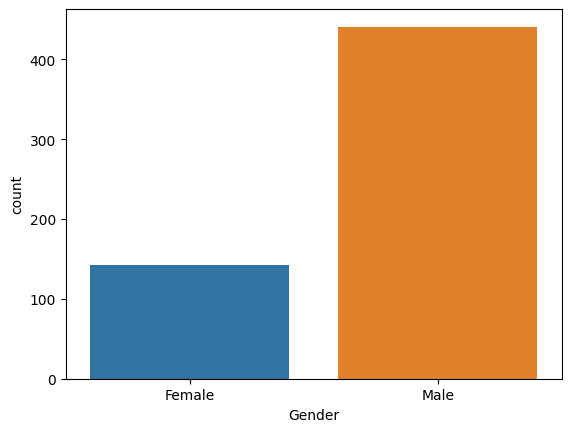

In [53]:
# Plotagem 
sns.countplot(data = dados, x = 'Gender', label = 'count')

# Value Counts
M, F = dados['Gender'].value_counts()

# Print
print(f'Numéro de pacientes do sexo masculino: {M}')
print(f'Numéro de pacientes do sexo feminino: {F}')

In [54]:
# Transfomando a variável não numérica usando Label enconding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [56]:
# Aplicando à variável
dados['Gender'] = dados['Gender'].map(encoding_func)

In [58]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
350,37,0,1.8,0.8,145,62,58,5.7,2.9,1.00,1
146,66,1,2.9,1.3,168,21,38,5.5,1.8,0.40,1
45,35,0,1.8,0.6,275,48,178,6.5,3.2,0.90,0
46,21,0,3.9,1.8,150,36,27,6.8,3.9,1.34,1
453,46,0,0.7,0.2,224,40,23,7.1,3.0,0.70,1


# Verificando a Relação Entre Variáveis

In [59]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


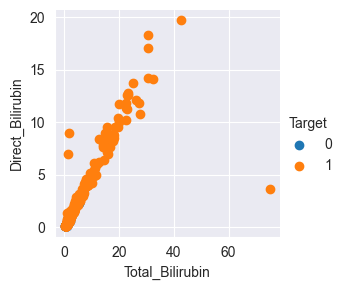

In [67]:
# Definindo estilo para o background
sns.set_style('darkgrid')

# Facetgrid (Verificando variáveis com alta correlação e envolvendo com a target)
sns.FacetGrid(dados, hue = 'Target').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


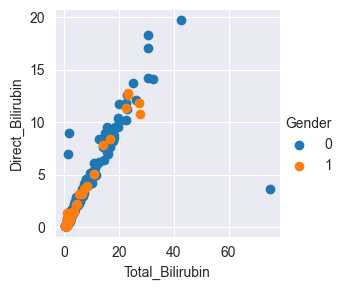

In [70]:
# Definindo estilo para o background
sns.set_style('darkgrid')

# Facetgrid (Verificando variáveis com alta correlação e envolvendo com a target)
sns.FacetGrid(dados, hue = 'Gender').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


Com o gráfico acima, podemos ver que o sexo do paciente não tem relação com a variável

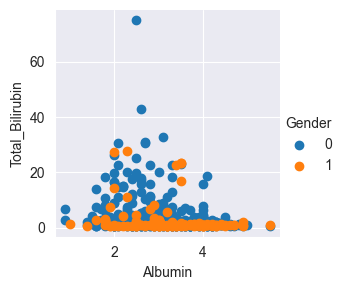

In [71]:
# Definindo estilo para o background
sns.set_style('darkgrid')

# Facetgrid (Verificando variáveis com alta correlação positiva ou negativa envolvendo com a target)
sns.FacetGrid(dados, hue = 'Gender').map(plt.scatter, 'Albumin', 'Total_Bilirubin').add_legend()


In [72]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [73]:
# Verificando registros duplicados (Complete Cases)
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


# Limpeza dos DADOS

#### Registros duplicados

In [74]:
dados.shape

(583, 11)

In [75]:
# Remova registros duplicados (Remove uma das duplicadas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


#### Tratamento de Outliers

In [77]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: >

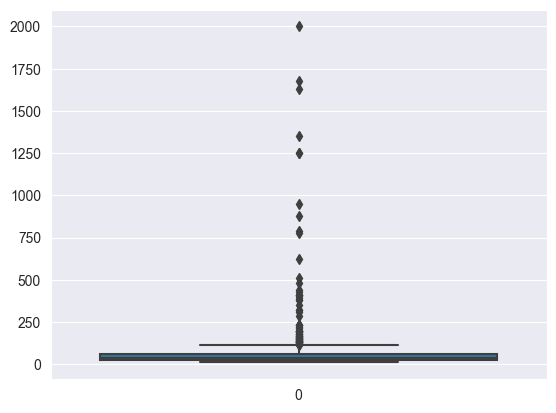

In [79]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)